# Kruskal's algorithm
1. Start with an ordered list of edges L and n groups with 1 vertex each
2. Repeat until there are |L| - 1 edges in the solution
    2. Pick the first edge that is not in the solution yet

In [15]:
import random
from graphviz import Graph
import pandas as pd
from IPython.display import display
random.seed()

In [19]:
class Edge:
    def __init__(self, source, target, weight):
        self.source = source
        self.target = target
        self.weight = weight    

In [186]:
def show_graph(graph):
    g=Graph('G')
    g.node_attr.update(shape='circle')
    for x in range(len(graph[0])):
        for y in range(x, len(graph[0])):
            value = graph[x][y]
            if(value!=None):
                g.edge(str(x),str(y),label=str(value))
    return g

def contains_edge(solution, x, y):
    for edge in solution:
        if(edge.source == x and edge.target == y) or (edge.source == y and edge.target == x):
            return True
    return False

def show_solution(graph, solution):
    g=Graph('G')
    g.node_attr.update(shape='circle')
    for x in range(len(graph[0])):
        for y in range(x, len(graph[0])):
            value = graph[x][y]
            if(value!=None):
                if(contains_edge(solution,x,y)):
                    g.edge(str(x),str(y),label=str(graph[x][y]), color='red')
                else:
                    g.edge(str(x),str(y),label=str(value))
    return g

def generate_complete_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices):
        for y in range(nr_vertices):
            if(x == y):
                weight = None
            else:
                weight = random.randint(1,max_weight)
            graph[x][y] = weight
            graph[y][x] = weight
    return graph
        
def generate_random_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices):
        for y in range(nr_vertices):
            edge_exists = random.randint(1,3)
            if(x == y or edge_exists != 1):
                weight = None
            else:
                weight = random.randint(1,max_weight)
            graph[x][y] = weight
            graph[y][x] = weight
    return graph

def print_matrix(graph):
    for x in range(len(graph[0])):
        for y in range(len(graph[0])):
            if y != len(graph[0])-1:
                print(graph[x][y], end=" ")      
            else:
                print("")

def findSmallestEdge(solution):
    smallest_weight = float('inf')
    smallest_index_origin = None
    smallest_index_target = None
    
    for vertice in solution:
        for x in range(nr_vertices):
            if (x not in solution):
                weight = graph[vertice][x]
                if(weight!=None and weight < smallest_weight):
                    smallest_weight = weight
                    smallest_index_origin = vertice
                    smallest_index_target = x
    if smallest_index_origin == None:
        return None
    else:
        return Edge(smallest_index_origin,smallest_index_target, smallest_weight)
    
    
def get_edges(graph):
    edges = []
    for x in range(len(graph[0])):
        for y in range(x, len(graph[0])):
            if(graph[x][y] != None):
                edges.append(Edge(x,y,graph[x][y]))
    return edges

In [162]:
def prim(graph):
    solution = []
    vertices_added = []
    initial=random.randint(0,nr_vertices-1)
    vertices_added.append(initial)
    new_edge = findSmallestEdge(vertices_added)
    if(new_edge != None):
        vertices_added.append(new_edge.target)
        solution.append(new_edge)
    #print("Origin: %d   Target: %d" % (new_edge.source, new_edge.target))
    while(len(vertices_added) != nr_vertices):
        new_edge = findSmallestEdge(vertices_added)
        if(new_edge!=None):
            vertices_added.append(new_edge.target)
            solution.append(new_edge)    
            #print("Origin: %d   Target: %d" % (new_edge.source, new_edge.target))
        else:
            break
    return solution

def kruskal(graph):
    solution = []
    edges = get_edges(graph)
    sorted_edges = sorted(edges, key=lambda x: x.weight)

    subgraphs = []
    for x in range(nr_vertices):
        subgraph = [x]
        subgraphs.append(subgraph)

    edges_index = 0
    while(len(solution) != nr_vertices - 1):
        if(edges_index >= len(edges)):
            print('no solution found')
            break
        next_edge = sorted_edges[edges_index]
        source_index = -1
        target_index = -1
        for subgraph in range(len(subgraphs)):
            if(next_edge.source in subgraphs[subgraph]):
                source_index=subgraph
            if(next_edge.target in subgraphs[subgraph]):
                target_index=subgraph
        #print('new iteration edge: %d,%d' % (next_edge.source, next_edge.target))
        #print(subgraphs)
        #print('source: %d    target: %d' % (source_index, target_index) )
        if(source_index != -1 and target_index != -1):
            if(source_index != target_index):
                solution.append(next_edge)
                new_subgraph = subgraphs[source_index] + subgraphs[target_index]
                subgraphs.pop(source_index)
                if(target_index > source_index):
                    target_index = target_index - 1
                subgraphs.pop(target_index)
                subgraphs.append (new_subgraph)
        
        edges_index = edges_index+1
        
    return solution

,0,1,2,3,4,5,6,7
0,NaN,NaN,NaN,5.0,NaN,1.0,2.0,3.0
1,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3,5.0,NaN,NaN,NaN,9.0,2.0,NaN,NaN
4,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
5,1.0,5.0,NaN,2.0,NaN,NaN,5.0,2.0
6,2.0,NaN,NaN,NaN,NaN,5.0,NaN,9.0
7,3.0,5.0,8.0,NaN,NaN,2.0,9.0,NaN


prim:
total weight: 29
kruskal:
total weight: 29


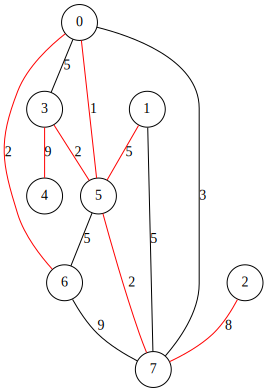

In [192]:
nr_vertices = 8
#graph = generate_complete_graph(nr_vertices, 10)
#graph = generate_random_graph(nr_vertices, 10)
#show_graph(graph)

solution_prim = prim(graph)
solution_kruskal = kruskal(graph)

df = pd.DataFrame(graph)
display(df)
#print_matrix(graph)

print('prim:')
total_weight = 0
for x in solution_prim:
    #print("Origin: %d   Target: %d  Weight: %d" % (x.source, x.target, x.weight))
    total_weight = total_weight + x.weight
print('total weight: %d' % (total_weight))
    
total_weight = 0
print('kruskal:')
for x in solution_kruskal:
    #print("Origin: %d   Target: %d  Weight: %d" % (x.source, x.target, x.weight))
    total_weight = total_weight + x.weight
print('total weight: %d' % (total_weight))
#show_solution(graph, solution_prim)

show_solution(graph, solution_prim)
#show_graph(graph)